<module 'matplotlib.pyplot' from '/Users/anissaz/miniconda3/envs/uxsandbox/lib/python3.10/site-packages/matplotlib/pyplot.py'>

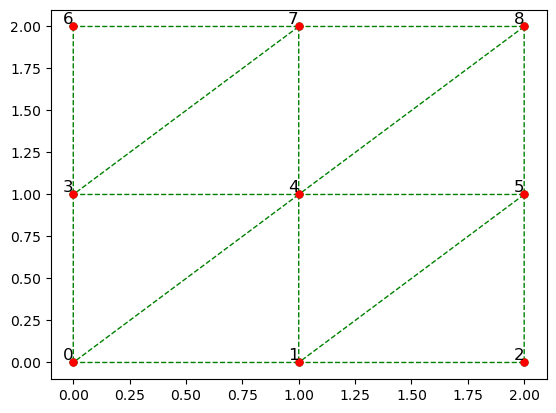

In [2]:
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Create a simple triangular mesh
n_nodes = 9
n_faces = 8

nodes_lon = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
nodes_lat = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

faces_nodes = np.array([
    [0, 3, 4],
    [1, 4, 0],
    [1, 5, 4],
    [2, 5, 1],
    [3, 6, 7],
    [4, 7, 3],
    [4, 8, 5],
    [8, 7, 4]
])

# Create a UGRID compliant NetCDF file for the mesh
with netCDF4.Dataset("ugrid_mesh.nc", "w", format="NETCDF4") as ds:
    ds.createDimension("n_nodes", n_nodes)
    ds.createDimension("n_faces", n_faces)
    ds.createDimension("n_max_face_nodes", 3)

    var_lon = ds.createVariable("mesh2d_node_lon", "f8", ("n_nodes",))
    var_lat = ds.createVariable("mesh2d_node_lat", "f8", ("n_nodes",))
    var_faces = ds.createVariable("mesh2d_face_nodes", "i4", ("n_faces", "n_max_face_nodes"))

    var_lon[:] = nodes_lon
    var_lat[:] = nodes_lat
    var_faces[:] = faces_nodes + 1  # UGRID indexing starts at 1

    ds.setncattr("cf_role", "mesh_topology")
    ds.setncattr("topology_dimension", 2)
    ds.setncattr("node_coordinates", "mesh2d_node_lon mesh2d_node_lat")
    ds.setncattr("face_coordinates", "")
    ds.setncattr("face_node_connectivity", "mesh2d_face_nodes")

# Create temperature data on the mesh
temp_data = np.random.rand(n_faces)

# Create a NetCDF file for the temperature data
with netCDF4.Dataset("ugrid_temperature.nc", "w", format="NETCDF4") as ds:
    ds.createDimension("n_faces", n_faces)

    var_temp = ds.createVariable("temperature", "f8", ("n_faces",))

    var_temp[:] = temp_data
    var_temp.setncattr("mesh", "ugrid_mesh")
    var_temp.setncattr("location", "face")

# Plot the mesh using matplotlib
plt.figure()
triang = tri.Triangulation(nodes_lon, nodes_lat, triangles=faces_nodes)
plt.triplot(triang, "go--", lw=1, markersize=5)
plt.plot(nodes_lon, nodes_lat, "ro", markersize=5)
for i in range(n_nodes):
    plt.text(nodes_lon[i], nodes_lat[i], f"{i}", ha="right", va="bottom", fontsize=12)
plt
